In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
layoutname = 'myhomecourse'# name on udisc
playername = 'player1'# name on udisc
layoutlabel = 'home course standard'#label to appear on figures

In [3]:
df = pd.read_csv('UDisc Scorecards.csv')
df['Date'] = pd.to_datetime(df['Date'])
df_ng = df[df['LayoutName']== layoutname]
df_ng = df_ng[df_ng['PlayerName']== playername]
df_ng_full = df_ng.loc[(df_ng[['Hole'+str(i) for i in np.arange(1,13,1)]] != 0).all(axis='columns')]
df_ng_full['rolling'] = df_ng_full['+/-'].rolling(10,center=True).mean()
df_ng_full['color'] = ['+' if c >= 0 else '-' for c in df_ng_full['+/-'].values]
#print(df_ng[['Hole'+str(i) for i in np.arange(1,13,1)]] != 0).all(axis='columns')
df_ng_full = df_ng_full.reindex(index=df_ng_full.index[::-1])
df_ng_full = df_ng_full.reset_index()
df_ng['year'] = df_ng['Date'].dt.year
df_ng['month'] = df_ng['Date'].dt.month
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df_ng['season'] = df_ng['month'].apply(lambda x: season_dict[x])

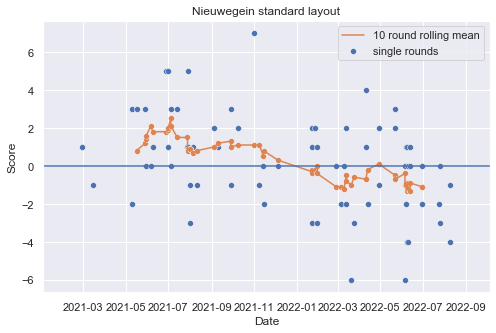

In [4]:
# score vs date
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x = 'Date', y = '+/-', data = df_ng_full,ax=ax, label = 'single rounds')
sns.scatterplot(x = 'Date', y = 'rolling', data = df_ng_full,ax=ax)
sns.lineplot(x = 'Date', y = 'rolling', data = df_ng_full,ax=ax, markers=True, color ='C1',label='10 round rolling mean')
ax.axhline(0)
plt.legend()
plt.ylabel('Score')
plt.title(layoutlabel)
plt.show()

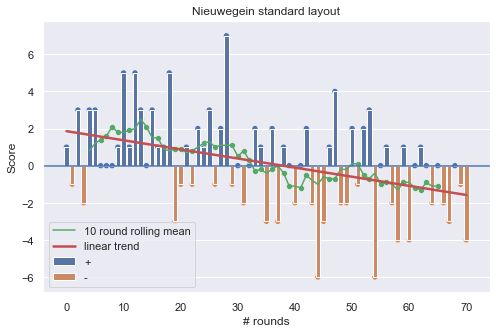

In [5]:
# score vs round number
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x = df_ng_full.index, y = '+/-', data = df_ng_full,ax=ax, hue='color', dodge = False)
sns.scatterplot(x = df_ng_full.index, y = '+/-', data = df_ng_full,ax=ax, hue='color', legend = False)
sns.scatterplot(x = df_ng_full.index, y = 'rolling', data = df_ng_full,ax=ax, color = 'C2')
sns.lineplot(x = df_ng_full.index, y = 'rolling', data = df_ng_full,ax=ax, markers=True, color ='C2',label='10 round rolling mean')
ax.axhline(0)
a,b = np.polyfit(df_ng_full.index.values, df_ng_full['+/-'].values, deg=1)
xseq = df_ng_full.index.values
ax.plot(xseq, b + a * xseq, color="C3", lw=2.5,label='linear trend')
ax.set_xticks(np.arange(0,len(df_ng_full),10))
ax.set_xticklabels(np.arange(0,len(df_ng_full),10))
plt.legend()
plt.ylabel('Score')
plt.xlabel('# rounds')
plt.title(layoutlabel)
plt.show()

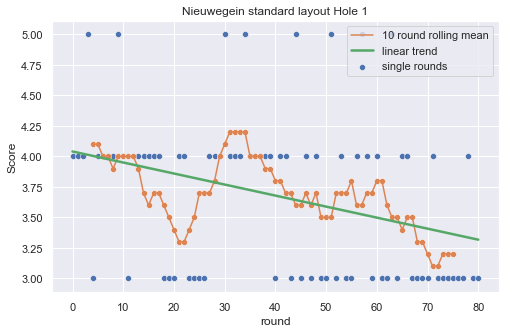

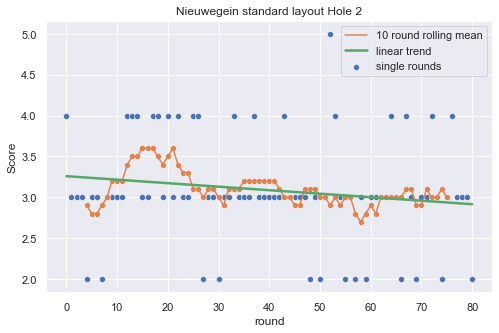

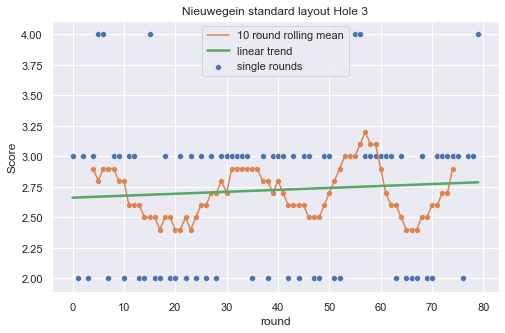

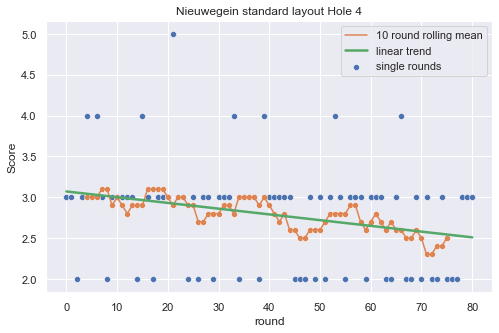

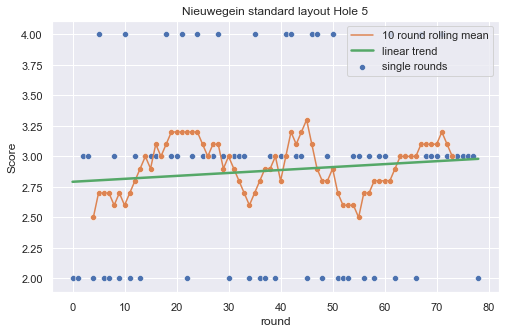

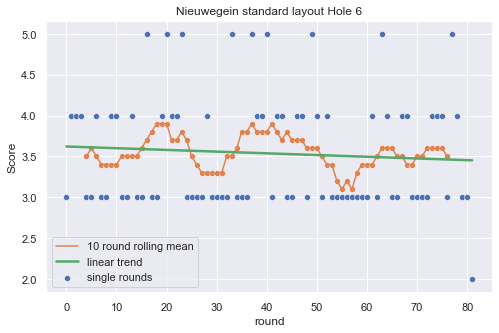

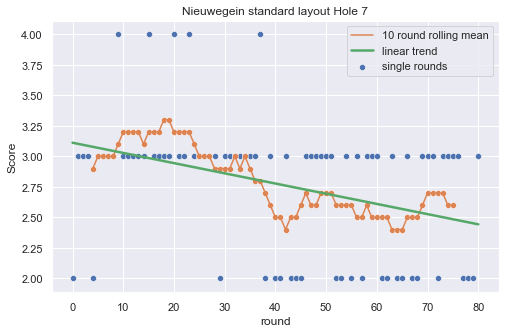

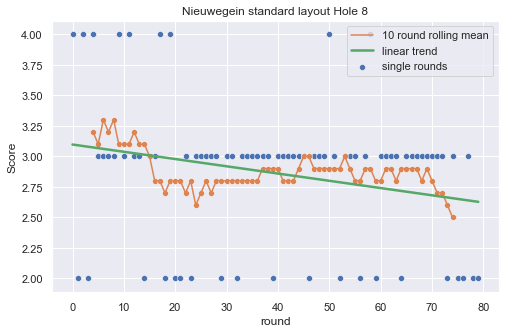

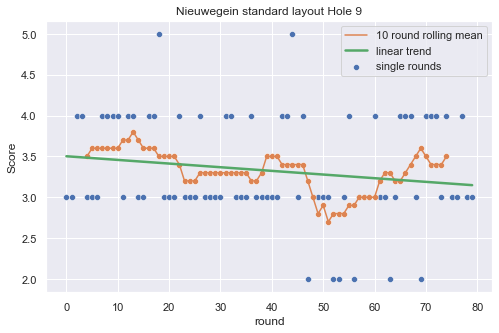

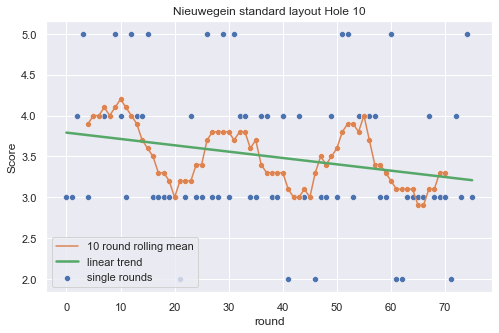

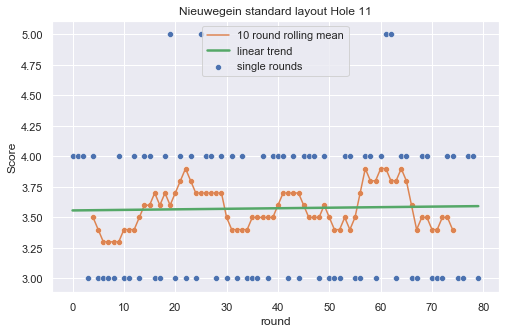

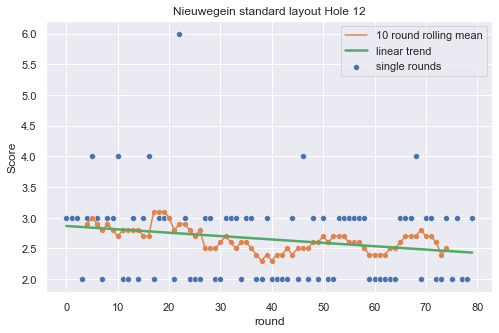

No data for hole 13
No data for hole 14
No data for hole 15
No data for hole 16
No data for hole 17
No data for hole 18
No data for hole 19
No data for hole 20
No data for hole 21
No data for hole 22
No data for hole 23
No data for hole 24
No data for hole 25
No data for hole 26
No data for hole 27


In [12]:
# score vs round number per hole
for x in np.arange(1,28,1):
    if df_ng.count()['Hole'+str(x)] == 0:
        print('No data for hole '+str(x))
        continue
    df_ng_tmp = df_ng.loc[(df_ng[['Hole'+str(x)]] != 0).all(axis='columns')]
    df_ng_tmp['rolling'] = df_ng_tmp['Hole'+str(x)].rolling(10,center=True).mean()
    #print(df_ng[['Hole'+str(i) for i in np.arange(1,13,1)]] != 0).all(axis='columns')
    df_ng_tmp = df_ng_tmp.reindex(index=df_ng_tmp.index[::-1])
    df_ng_tmp = df_ng_tmp.reset_index()
    sns.set()
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x = df_ng_tmp.index, y = 'Hole'+str(x), data = df_ng_tmp,ax=ax, label = 'single rounds')
    sns.scatterplot(x = df_ng_tmp.index, y = 'rolling', data = df_ng_tmp,ax=ax)
    sns.lineplot(x = df_ng_tmp.index, y = 'rolling', data = df_ng_tmp,ax=ax, markers=True, color ='C1',label='10 round rolling mean')
    a,b = np.polyfit(df_ng_tmp.index.values, df_ng_tmp['Hole'+str(x)].values, deg=1)
    xseq = df_ng_tmp.index.values
    ax.plot(xseq, b + a * xseq, color="C2", lw=2.5,label='linear trend')
    plt.legend()
    plt.ylabel('Score')
    plt.xlabel('round')
    plt.title(layoutlabel+' Hole '+str(x))
    plt.show()

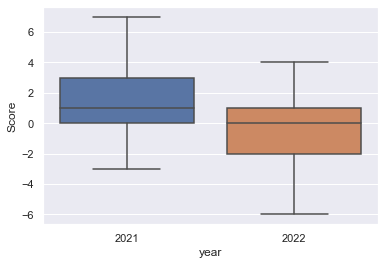

In [13]:
# yearly box plots
ax = sns.boxplot(x="year", y="+/-", data=df_ng)
plt.ylabel('Score')
plt.show()

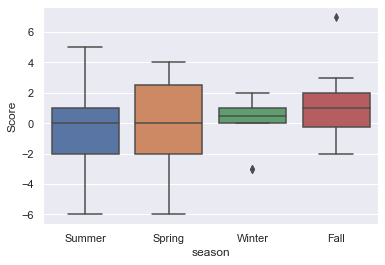

In [14]:
# seasonal box plots
ax = sns.boxplot(x="season", y="+/-", data=df_ng)
plt.ylabel('Score')
plt.show()